In [1]:
## Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
##importing the data set

data=pd.read_csv("/content/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
##checing the null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data.Rating=data.Rating.fillna(0)

In [6]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [7]:
## removing Nan values from data

data.dropna(how='any',inplace=True)

In [8]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
data.describe()     ### so evrything looking fine no outliers found in the data set

,Rating
count,10829.000000
mean,3.623197
std,1.513263
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,5.000000


In [10]:
## converting evrything in uppercase
  
data.App=data.App.apply(lambda x: x.upper())

Text(0, 0.5, 'Number of downloads in M')

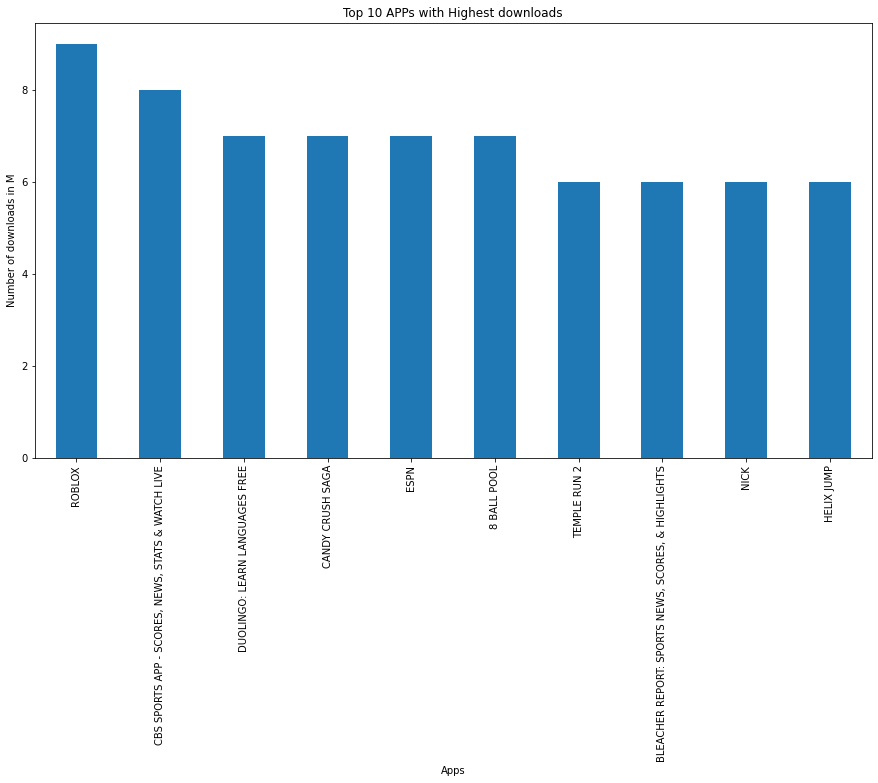

In [11]:
## Top 10 Apps with highest downloads

plt.figure(figsize=(15,8))
data.groupby('App')['Installs'].count().sort_values(ascending=False)[:10].plot.bar()
plt.title("Top 10 APPs with Highest downloads")
plt.xlabel("Apps")
plt.xticks(rotation=(90))
plt.ylabel("Number of downloads in M")

In [12]:
## How many apps got 5 out of 5 Ratings

data[data.Rating==5].count()

App               274
Category          274
Rating            274
Reviews           274
Size              274
Installs          274
Type              274
Price             274
Content Rating    274
Genres            274
Last Updated      274
Current Ver       274
Android Ver       274
dtype: int64

- 274 Apps got 5 star Rating...

In [13]:
## cost of APPs
data.groupby('Price')['App'].count().sort_values(ascending=False)

Price
0          10032
$0.99        146
$2.99        129
$1.99         73
$4.99         72
           ...  
$2.90          1
$2.60          1
$2.59          1
$2.56          1
$299.99        1
Name: App, Length: 92, dtype: int64

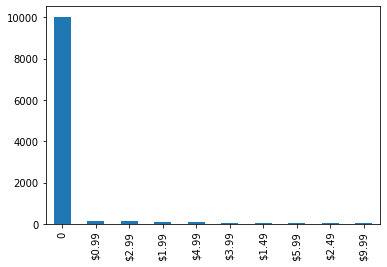

In [19]:
data.Price.value_counts()[:10].plot.bar()

In [21]:
## category wise most downloads

data.groupby(['Category'])['Installs'].count().sort_values(ascending=False)

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Installs, dtype: int64

Text(0, 0.5, 'Downloads')

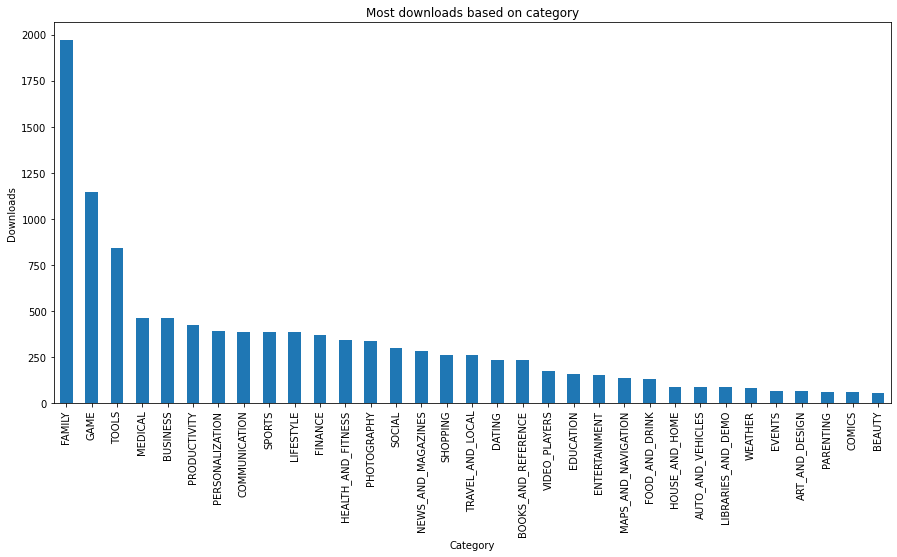

In [25]:

plt.figure(figsize=(15,7))
data.groupby('Category')['Installs'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Most downloads based on category")
plt.ylabel("Downloads")

Text(0, 0.5, 'Downloads')

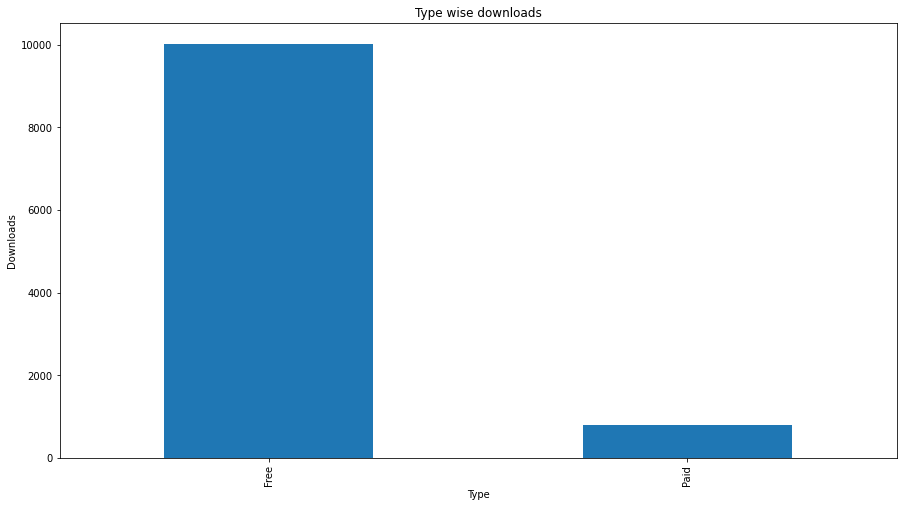

In [26]:
## downloads by type
plt.figure(figsize=(15,8))
data.groupby('Type')['Installs'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Type wise downloads")
plt.ylabel("Downloads")

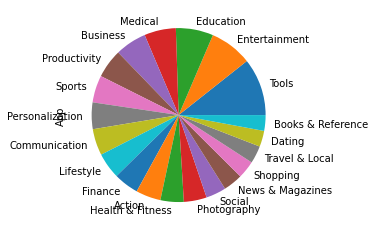

In [31]:
## apps based on genres

data.groupby('Genres')['App'].count().sort_values(ascending=False)[:20].plot(kind='pie')

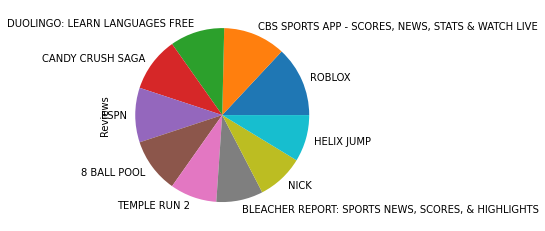

In [37]:
## most reviews for app

data.groupby('App')['Reviews'].count().sort_values(ascending=False)[:10].plot(kind='pie')

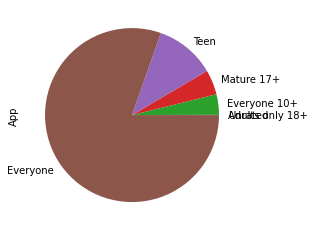

In [43]:
## Apps based on Content Rating

data.groupby('Content Rating')['App'].count().sort_values().plot(kind='pie')

In [46]:
## percentage of Content Rating

data['Content Rating'].value_counts(normalize=True)*100

Everyone           80.376766
Teen               11.155231
Mature 17+          4.607997
Everyone 10+        3.813833
Adults only 18+     0.027703
Unrated             0.018469
Name: Content Rating, dtype: float64

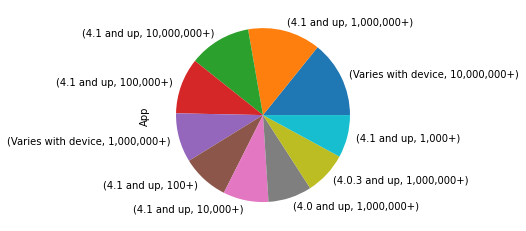

In [60]:
data.groupby(['Android Ver','Installs'])['App'].count().sort_values(ascending=False)[:10].plot(kind='pie')

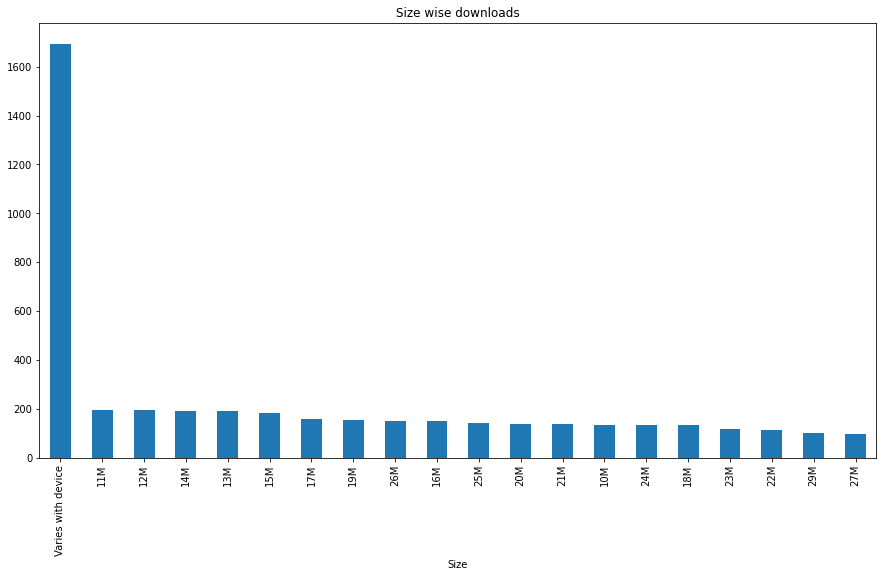

In [92]:
## App by size installs
plt.figure(figsize=(15,8))
plt.title("Size wise downloads")
data.groupby('Size')['Installs'].count().sort_values(ascending=False).head(20).plot.bar()


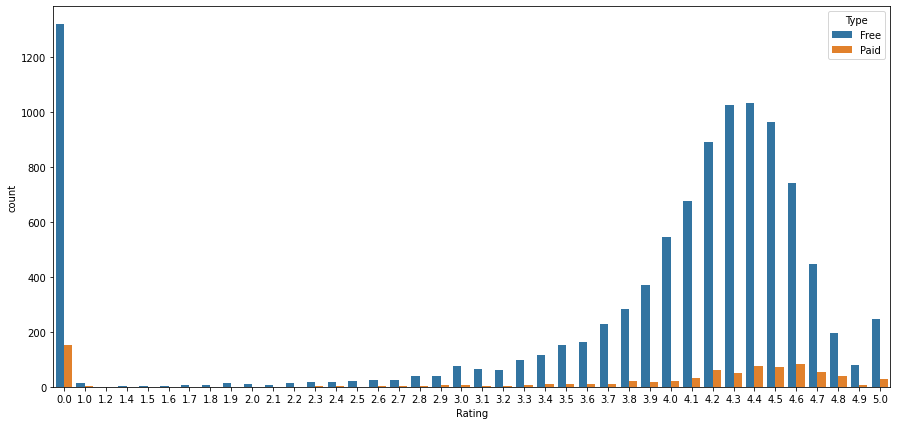

In [96]:


plt.figure(figsize=(15,7))
sb.countplot(x='Rating',hue='Type',data=data)

- >Conclusions

  1. Roblox is the most downloaded App.
  2. Total 274 apps got % star Rating.
  3. Most of the apps are free of cost.
  4. Most apps downloaded for FAMILY category. 
  5. most downloaded apps are free of cost.
  6. Maximum apps are tools Genres.
  7. Roblox is the app got more reviews.
  8. Most of the Apps are Everyone (80.37%).
  9. Apps with Android version varies with the device most downloaded.
  10. Apps with size varies with devices downloaded the most.
  11. most Apps got less(0) rating and highest(5) are free of cost Apps.